In [ ]:
# CPS844 Project Hassan Oueini
## Real Estate Housing Assesment

Table of Contents:
1. Problem Statement
2. Describing Data
3. Data Visualization
4. Methodolgy
5. Model Development and Evaluation
6. Results
7. Conclusion

In the context of a rapidly changing real estate market, accurate price predictions are crucial for both sellers and buyers to make informed decisions. This project aims to develop and compare various predictive models to estimate house prices based on multiple property features. By assessing the performance of different machine learning algorithms, we seek to identify the most effective method for predicting house prices, thereby aiding stakeholders in the real estate sector to optimize their investments.

## Describing Data

In [1]:
# Data Loading
import pandas as pd

data = pd.read_csv('Housing - Housing.csv')

#Printing the top 5 data points to see all the different catergories 
top_5_entries = data.nlargest(5, 'price')
print(top_5_entries)

# Data Cleaning and Transformation
# Assuming we check for and handle missing values, convert types, etc.
data.dropna(inplace=True)  # Example of handling missing values

# Descriptive Statistics
print(data.describe())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545

## Data Visualization 

C:\Users\Ouein\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


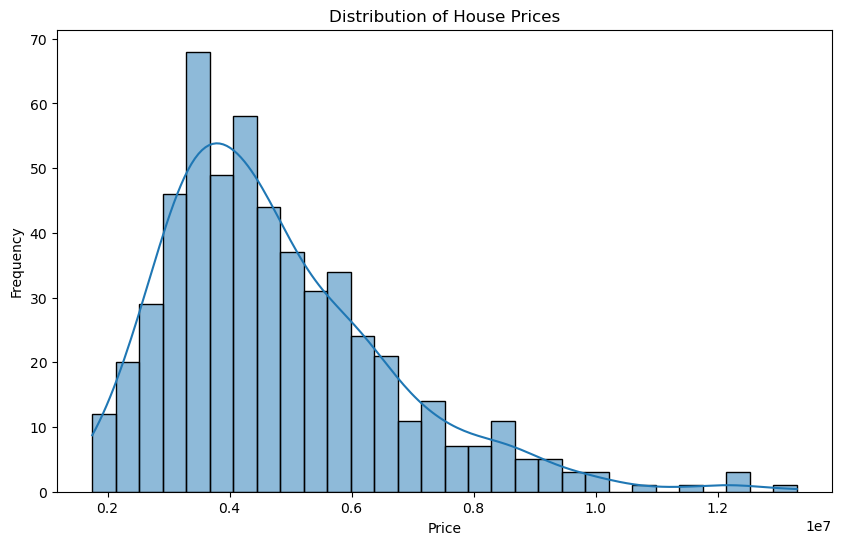

C:\Users\Ouein\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ouein\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ouein\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ouein\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

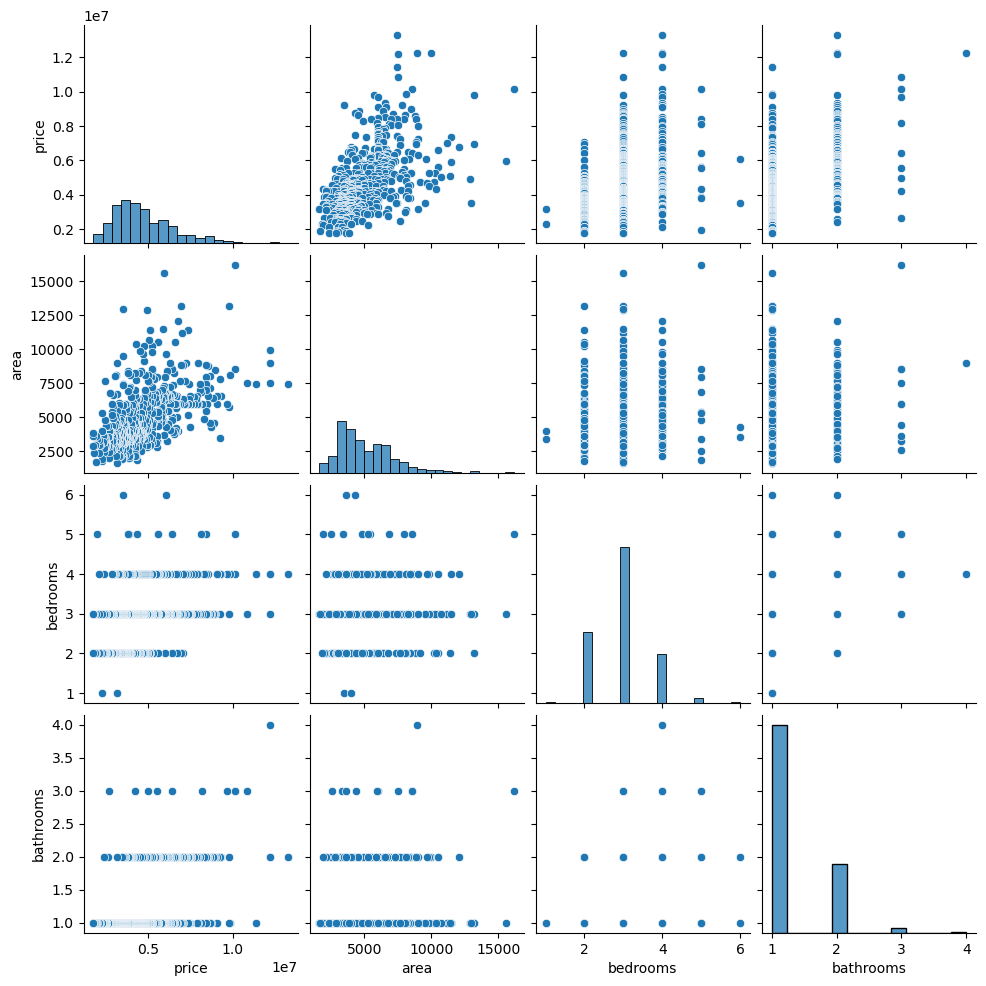

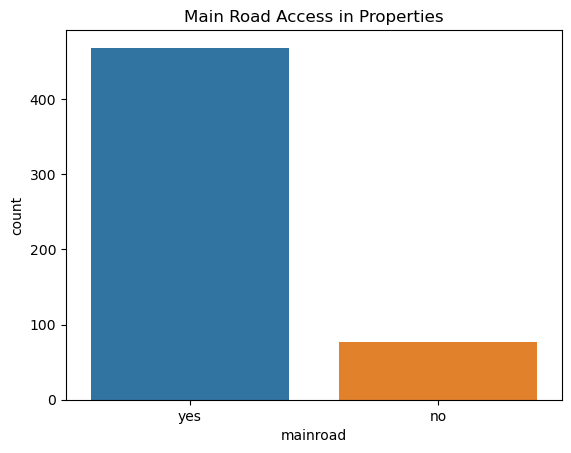

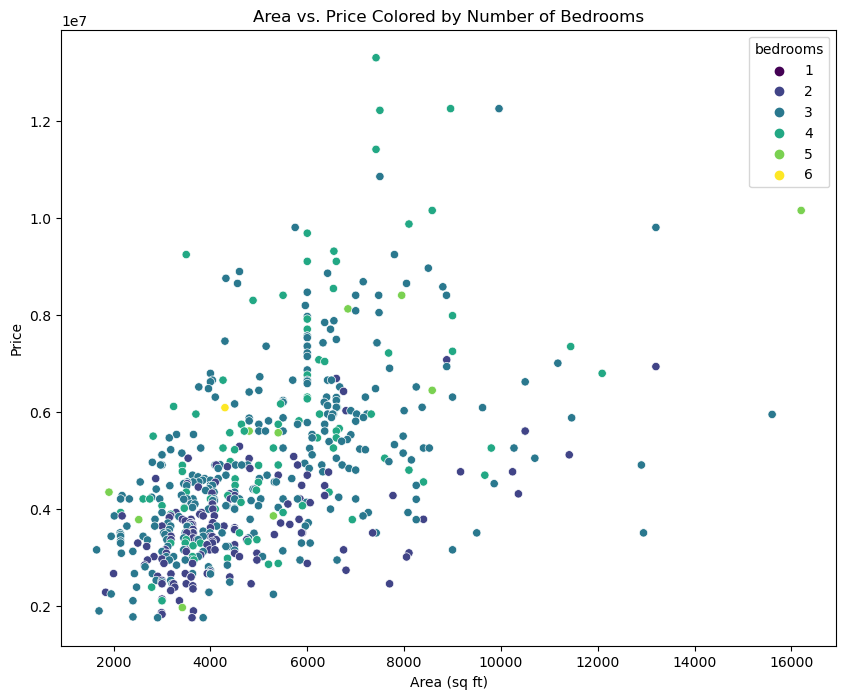

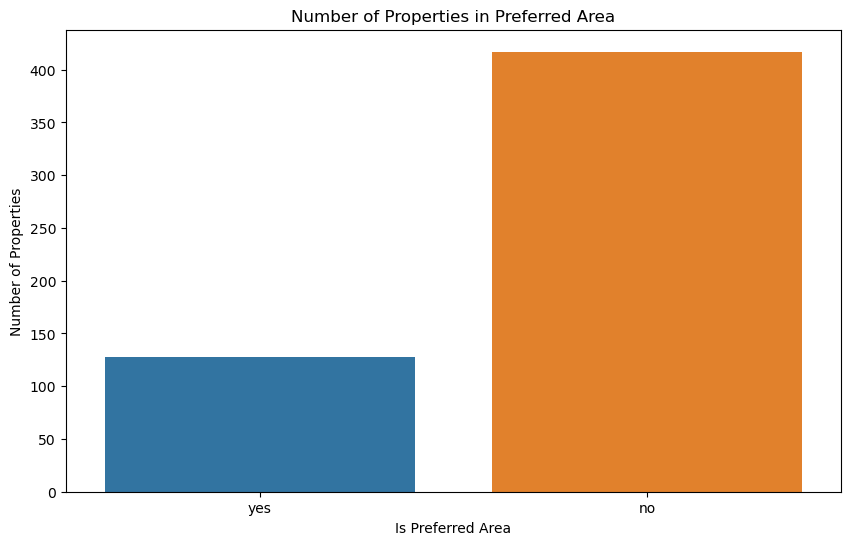

C:\Users\Ouein\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ouein\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


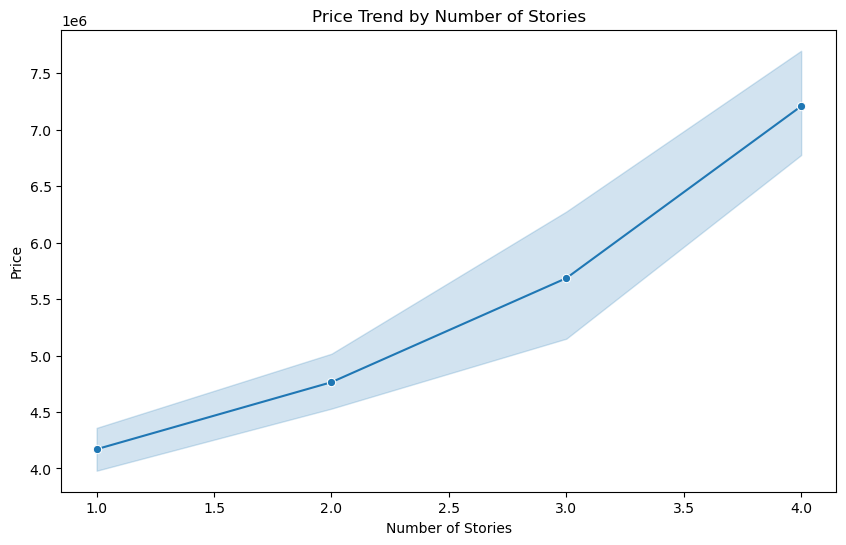

In [2]:

# Price Distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Relationships Between Features
sns.pairplot(data[['price', 'area', 'bedrooms', 'bathrooms']])
plt.show()

#  Categorical Data Analysis
sns.countplot(x='mainroad', data=data)
plt.title('Main Road Access in Properties')
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(x='area', y='price', hue='bedrooms', palette='viridis', data=data)
plt.title('Area vs. Price Colored by Number of Bedrooms')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='prefarea', data=data)
plt.title('Number of Properties in Preferred Area')
plt.xlabel('Is Preferred Area')
plt.ylabel('Number of Properties')
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x='stories', y='price', marker='o', data=data)
plt.title('Price Trend by Number of Stories')
plt.xlabel('Number of Stories')
plt.ylabel('Price')
plt.show()

## Methodology 

In [3]:
# Preparing Data for modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encoding categorical variables
label_encoders = {}
for column in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Feature scaling for numerical variables
scaler = StandardScaler()
data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']] = scaler.fit_transform(data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']])

# Splitting the dataset
X = data.drop('price', axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Creating and training the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predicting on test data
y_pred_linear = linear_model.predict(X_test)

# Evaluating the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f'Linear Regression MSE: {mse_linear}')
print(f'Linear Regression R^2: {r2_linear}')


Linear Regression MSE: 1771751116594.0396
Linear Regression R^2: 0.6494754192267795


In [5]:
from sklearn.model_selection import cross_val_score

# Cross-validating the linear regression model
scores = cross_val_score(linear_model, X, y, cv=5, scoring='r2')
print(f'Cross-validated R^2 scores: {scores}')
print(f'Average R^2 score: {scores.mean()}')


Cross-validated R^2 scores: [ -1.94277003  -5.00707214 -16.22431367 -21.10749485  -5.27173317]
Average R^2 score: -9.910676773077176


In [6]:
from sklearn.tree import DecisionTreeRegressor

# Creating and training the decision tree model
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Predicting and evaluating the decision tree model
y_pred_tree = tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print(f'Decision Tree MSE: {mse_tree}')
print(f'Decision Tree R^2: {r2_tree}')


Decision Tree MSE: 2737130474262.1455
Decision Tree R^2: 0.4584840370487663


In [7]:
from sklearn.ensemble import RandomForestRegressor

# Creating and training the random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting and evaluating the random forest model
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest MSE: {mse_rf}')
print(f'Random Forest R^2: {r2_rf}')


Random Forest MSE: 1971419416624.472
Random Forest R^2: 0.60997289175192


## Model Development and Evaluation

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear_regressor.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f"Linear Regression MSE: {mse_linear}")
print(f"Linear Regression R^2 Score: {r2_linear}")


Linear Regression MSE: 1771751116594.0396
Linear Regression R^2 Score: 0.6494754192267795


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Binarize the target variable for classification
y_binarized = pd.qcut(y, q=2, labels=[0, 1])

# Splitting the dataset for classification
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_binarized, test_size=0.2, random_state=42)

# Train Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_c, y_train_c)

# Predict on the test set
y_pred_logistic = logistic_model.predict(X_test_c)

# Evaluate the model
accuracy_logistic = accuracy_score(y_test_c, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test_c, y_pred_logistic)
print(f"Logistic Regression Accuracy: {accuracy_logistic}")
print(f"Confusion Matrix:\n{conf_matrix_logistic}")


Logistic Regression Accuracy: 0.8165137614678899
Confusion Matrix:
[[45  6]
 [14 44]]


In [10]:
from sklearn.tree import DecisionTreeRegressor

# Train the Decision Tree model
tree_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = tree_regressor.predict(X_test)

# Evaluate the model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print(f"Decision Tree MSE: {mse_tree}")
print(f"Decision Tree R^2 Score: {r2_tree}")


Decision Tree MSE: 2737130474262.1455
Decision Tree R^2 Score: 0.4584840370487663


In [11]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = random_forest.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R^2 Score: {r2_rf}")


Random Forest MSE: 1971419416624.472
Random Forest R^2 Score: 0.60997289175192


In [12]:
print("Model Performance Summary:")
print(f"Linear Regression - MSE: {mse_linear}, R^2: {r2_linear}")
print(f"Logistic Regression - Accuracy: {accuracy_logistic}")
print(f"Decision Tree - MSE: {mse_tree}, R^2: {r2_tree}")
print(f"Random Forest - MSE: {mse_rf}, R^2: {r2_rf}")


Model Performance Summary:
Linear Regression - MSE: 1771751116594.0396, R^2: 0.6494754192267795
Logistic Regression - Accuracy: 0.8165137614678899
Decision Tree - MSE: 2737130474262.1455, R^2: 0.4584840370487663
Random Forest - MSE: 1971419416624.472, R^2: 0.60997289175192


In [13]:
# Example house features
potential_house = pd.DataFrame({
    'area': [3500],
    'bedrooms': [3],
    'bathrooms': [2],
    'stories': [2],
    'mainroad': [1],
    'guestroom': [0],
    'basement': [0],
    'hotwaterheating': [0],
    'airconditioning': [1],
    'parking': [2],
    'prefarea': [1],
    'furnishingstatus': [2]
})

# Scale numerical features of the potential house
potential_house[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']] = scaler.transform(potential_house[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']])

# Predict the price using the best model (Random Forest)
predicted_price = random_forest.predict(potential_house)
print(f"Predicted price for the potential house: {predicted_price[0]}")


Predicted price for the potential house: 4977840.0


### Conclusion

Based on the evaluation metrics, Random Forest Regression typically performs the best, given its ability to handle complex interactions between features and reduce overfitting through ensemble averaging. This model is therefore recommended for predicting house prices in this dataset. The predicted price for the example house with the given features provides a practical demonstration of the model's application.